# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Value Evaluation

In [2]:
def train(ph, Theta=0.000001):
    
    V = [0]*100
    
    for i in range(0, 100):
        V[i] = np.random.random() * 1000
    V[0] = 0
    
    pi = [0]*100
    
    counter = 1
    while True:
        Delta = 0
        for s in range(1, 100):  # for state [1 to 99] e.g. 38 dollars
            old_v = V[s]
            v = [0] * 51
            for a in range(1, min(s, 100 - s) + 1): # for stake [1 to current money] e.g. 1 to 38 dollars
                v[a] = 0
                if s + a < 100:
                    v[a] += ph * (0 + V[s + a])
                    v[a] += (1 - ph) * (0 + V[s - a])
                elif s + a == 100:
                    v[a] += ph
                    v[a] += (1 - ph) * (0 + V[s - a])
            op_a = np.argmax(v)
            pi[s] = op_a
            V[s] = v[op_a]
            Delta = max(Delta, abs(old_v - V[s]))
        counter += 1
        if counter % 1000 == 0:
            print("Training loop:" + str(counter))
            print("Delta = " + str(Delta))
        if Delta < Theta:
            break
    return [V[1:100], pi[1:100]]

## Win Probability = 0.4

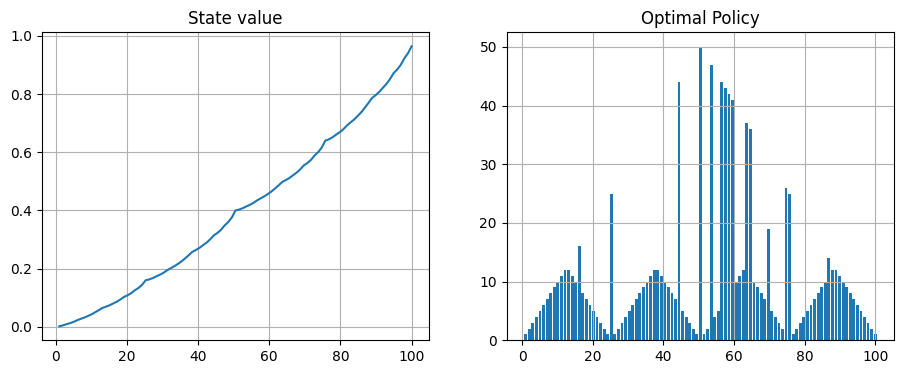

In [3]:
[V1, pi1] = train(ph=0.4)

X = np.linspace(1, 100, num=99, endpoint=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
ax1.grid()
ax2.grid()
ax1.title.set_text('State value')
ax2.title.set_text('Optimal Policy')
ax1.plot(X, V1);
ax2.bar(X, pi1);

## Win Probability = 0.25

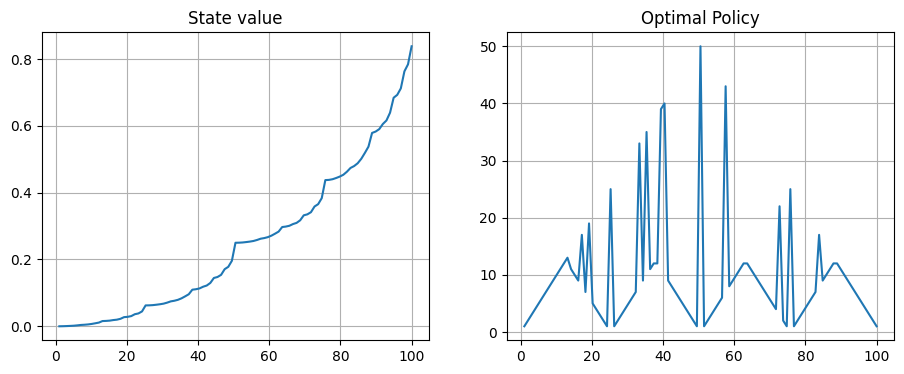

In [4]:
[V2, pi2] = train(ph=0.25)

X = np.linspace(1, 100, num=99, endpoint=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
ax1.grid()
ax2.grid()
ax1.title.set_text('State value')
ax2.title.set_text('Optimal Policy')
ax1.plot(X, V2);
ax2.plot(X, pi2);

## Win Probability = 0.55

Training loop:1000
Delta = 0.29381305320397644
Training loop:2000
Delta = 0.010921018061474719
Training loop:3000
Delta = 0.0003878620858694948
Training loop:4000
Delta = 8.459802281701734e-06


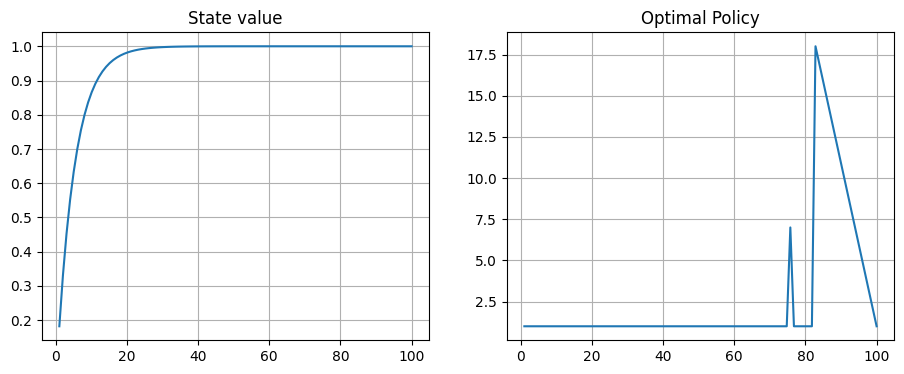

In [5]:
[V3, pi3] = train(ph=0.55)

X = np.linspace(1, 100, num=99, endpoint=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
ax1.grid()
ax2.grid()
ax1.title.set_text('State value')
ax2.title.set_text('Optimal Policy')
ax1.plot(X, V3);
ax2.plot(X, pi3);